In [1]:
# Are nested numba functions faster?

In [2]:
from numba import njit
import numpy as np
from timeit import timeit


@njit
def F1(A, active, work):

    s= 0.
    for n in active:
        for  w in range(work):
            s += max(A[n],A[0])
    return s

repeats = 100

num_particles = np.asarray([10**3,5*10**3, 10**4, 2*10**4,5*10**4, 10**5, 5*10**5,10**6, 2*10**6 , 5*10**6],dtype=np.int32)
work = np.asarray([1, 10, 100], dtype=np.int32)
#num_particles = np.asarray([],dtype=np.int32)
print('Setup',num_particles,num_particles.size)
N = num_particles.size
M = work.size
t1= np.zeros((N,M),dtype=np.float64)
t2= np.zeros((N,M),dtype=np.float64)

frac =.5

for m, w in enumerate(work):
    for n , n_part in enumerate(num_particles):    
        print('doing',w, n_part)
        out = np.zeros((n_part,), dtype=np.float64)
        active = np.sort(np.random.choice(np.arange(n_part), size=int(n_part*frac), replace=False))

        v1 = F1(out, active, w)
        
        t1[n,m]=  timeit(lambda  : F1(out, active, w),  number =repeats) 


Setup [   1000    5000   10000   20000   50000  100000  500000 1000000 2000000
 5000000] 10
doing 1 1000
doing 1 5000
doing 1 10000
doing 1 20000
doing 1 50000
doing 1 100000
doing 1 500000
doing 1 1000000
doing 1 2000000
doing 1 5000000
doing 10 1000
doing 10 5000
doing 10 10000
doing 10 20000
doing 10 50000
doing 10 100000
doing 10 500000
doing 10 1000000
doing 10 2000000
doing 10 5000000
doing 100 1000
doing 100 5000
doing 100 10000
doing 100 20000
doing 100 50000
doing 100 100000
doing 100 500000
doing 100 1000000
doing 100 2000000
doing 100 5000000


Text(0, 0.5, 'Time use, sec??')

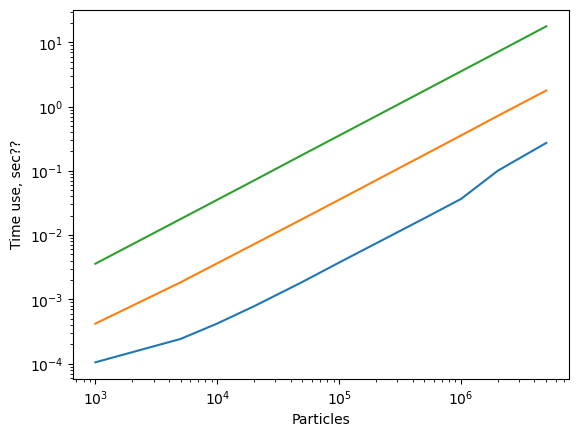

In [10]:
# plot    
from matplotlib import pyplot as plt
fig,ax = plt.subplots()   
ax.plot(num_particles,t1)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Particles')
ax.set_ylabel('Time use, sec??')


